# A autoencoder for mnist dataset

## import module

In [7]:
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt

## Modify the class "Mode" called "MyAE"

In [8]:
# make subclass of Model for autoecndoer
class MyAE(tf.keras.Model):
    def __init__(self, latent_dim):
        super(MyAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim)
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7 * 7 * 64, activation=tf.nn.relu),  # after, (none, 3136)
            tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
            tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding='SAME',
                                            activation='relu'),  # after, (none, 14, 14, 32)
            tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(2, 2), padding='SAME',
                                            activation='relu'),  # after, (none, 28, 28, 1)
        ])
    def call(self, inputs, training=False):
        latent_feature = self.encoder(inputs)
        return self.decoder(latent_feature)

## modefy you parameter at there

In [9]:
# para
BATCH_SIZE = 100
EPOCHS = 5
LATENT_DIM = 100

## load data and create dataset

In [10]:
# load mnist images
(train_images_raw, _), (test_images_raw, _) = tf.keras.datasets.mnist.load_data()

# reshape to 4d data, and normalizing the value to the range of [0., 1.]
train_images = train_images_raw.reshape(train_images_raw.shape + (1,)).astype('float32') /255.
test_images = test_images_raw.reshape(test_images_raw.shape + (1,)).astype('float32') /255.

# Binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.

# create dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_images)).shuffle(train_images.shape[0]).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_images)).shuffle(test_images.shape[0]).batch(BATCH_SIZE)

## create my predict image

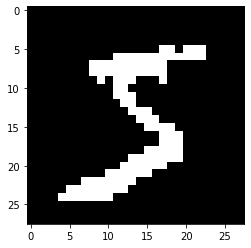

In [11]:
my_images = train_images[0:1]
my_show = my_images.reshape(my_images.shape[1:3]) * 255
my_show = Image.fromarray(my_show)
plt.imshow(my_show)

## run the model

In [12]:
model = MyAE(LATENT_DIM)
set_opt = tf.keras.optimizers.Adam()
model.compile(optimizer='Adam', loss='binary_crossentropy')
his = model.fit(train_dataset, epochs=EPOCHS, verbose=1, validation_data=test_dataset)

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1842 - val_loss: 0.0000e+00
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1355 - val_loss: 0.1093
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.1162 - val_loss: 0.1018
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0956 - val_loss: 0.1777
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1245 - val_loss: 0.0955


## test the ae's output, not latent feature

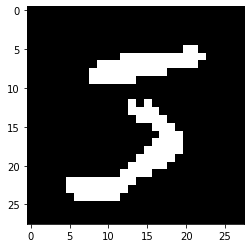

In [13]:
pre_images = model.predict(my_images)
pre_images = pre_images.reshape(pre_images.shape[1:3])

pre_images[pre_images >= .5] = 1.
pre_images[pre_images < .5] = 0.
pre_images = pre_images * 255
pre_images = Image.fromarray(pre_images)
plt.imshow(pre_images)

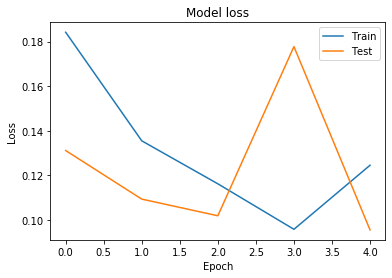

In [14]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
# plt.savefig('ae_mnist.png')
plt.show()

In [16]:
model.summary()
model.encoder.summary()

Model: "my_ae_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 100)               249316    
_________________________________________________________________
sequential_3 (Sequential)    (None, 28, 28, 1)         335489    
Total params: 584,805
Trainable params: 584,805
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_______________________________